### Import libraries

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [39]:
df = pd.read_csv("../dataset/transformed_train.csv")

### Data convertion to implement the model

In [40]:
df = pd.concat([df.drop("HomePlanet", axis = 1), pd.get_dummies(df["HomePlanet"])], axis = 1)
df = pd.concat([df.drop("Destination", axis = 1), pd.get_dummies(df["Destination"])], axis = 1)
df = pd.concat([df.drop("Deck", axis = 1), pd.get_dummies(df["Deck"])], axis = 1)
df = pd.concat([df.drop("Side", axis = 1), pd.get_dummies(df["Side"])], axis = 1)

df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,A,B,C,D,E,F,G,T,P,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1.0,...,False,False,False,False,False,True,False,False,False,True


In [41]:
# Clean empty data
df = df.dropna()
df.isnull().sum().sort_values(ascending=False)

CryoSleep        0
Age              0
P                0
T                0
G                0
F                0
E                0
D                0
C                0
B                0
A                0
TRAPPIST-1e      0
PSO J318.5-22    0
55 Cancri e      0
Mars             0
Europa           0
Earth            0
Cabin_num        0
Transported      0
VRDeck           0
Spa              0
ShoppingMall     0
FoodCourt        0
RoomService      0
VIP              0
S                0
dtype: int64

### Model: Random Forest

In [42]:
x = df.drop("Transported",axis=1)
y = df["Transported"]

In [43]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [48]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier(max_depth=7, n_estimators=50)
tree.fit(x_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=50)

### Model evaluation

In [49]:
from sklearn.metrics import classification_report

#Predictions
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

#Report with train data
report_train = classification_report(y_train,y_train_pred)
print(f"Report with train data:\n{report_train}")

#Report with test data
report_test = classification_report(y_test,y_test_pred)
print(f"Report with test data:\n{report_test}")

Report with train data:
              precision    recall  f1-score   support

       False       0.82      0.83      0.83      2832
        True       0.83      0.82      0.83      2868

    accuracy                           0.83      5700
   macro avg       0.83      0.83      0.83      5700
weighted avg       0.83      0.83      0.83      5700

Report with test data:
              precision    recall  f1-score   support

       False       0.77      0.80      0.78      1203
        True       0.80      0.77      0.78      1240

    accuracy                           0.78      2443
   macro avg       0.78      0.78      0.78      2443
weighted avg       0.78      0.78      0.78      2443



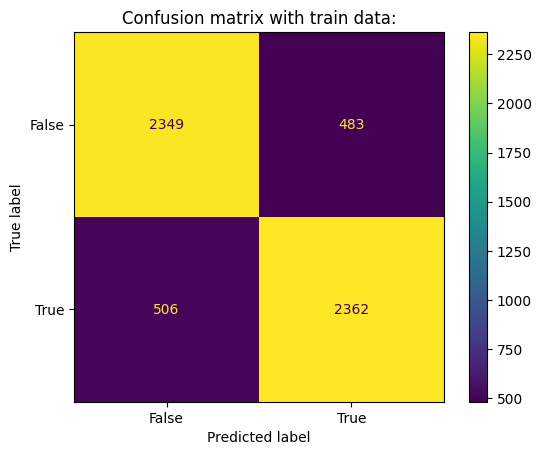

In [50]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_train, y_train_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels = tree.classes_)
display.plot()
plt.title("Confusion matrix with train data:")
plt.show()

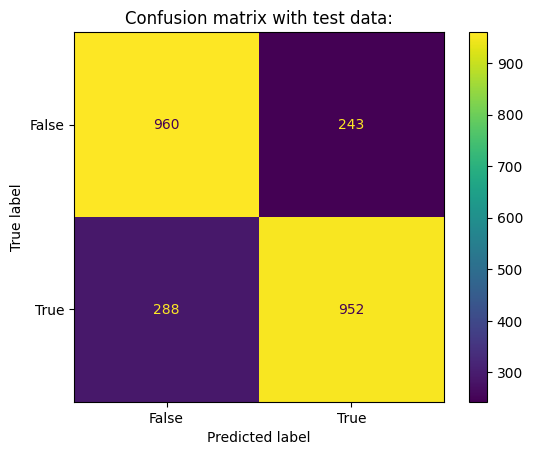

In [51]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels = tree.classes_)
display.plot()
plt.title("Confusion matrix with test data:")
plt.show()